In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

> Dataset: https://www.kaggle.com/code/trondataana/alzheimer-prediction-0-853-accuracy

Column Descriptions:
- Group --> Class
- Age --> Age
- EDUC --> Years of Education
- SES --> Socioeconomic Status / 1-5
- MMSE --> Mini Mental State Examination
- CDR --> Clinical Dementia Rating
- eTIV --> Estimated total intracranial volume
- nWBV --> Normalize Whole Brain Volume
- ASF --> Atlas Scaling Factor

In [82]:
df = pd.read_csv("C:/Users/fahee/Documents/DMML/alzheimer.csv")
df.shape

(373, 10)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [84]:
# checking for garbage values 
# Set display options to show more rows and columns (adjust as necessary)
pd.set_option('display.max_rows', 100)  # Adjust the number of rows to display as per your need
pd.set_option('display.max_columns', None)  # Display all columns

# Check for out-of-range values for Age (between 60 and 98)
age_outliers = df[(df['Age'] < 60) | (df['Age'] > 98)]

# Check for out-of-range values for EDUC (between 0 and 23 years)
educ_outliers = df[(df['EDUC'] < 0) | (df['EDUC'] > 23)]

# Check for out-of-range values for MMSE (between 0 and 30, as MMSE scores range between 0 and 30)
mmse_outliers = df[(df['MMSE'] < 0) | (df['MMSE'] > 30)]

# Check for out-of-range values for SES (Socioeconomic status is often between 1 and 5, adjust as per your data)
ses_outliers = df[(df['SES'] < 1) | (df['SES'] > 5)]

# Check for out-of-range values for CDR (Clinical Dementia Rating, values are typically between 0 and 3)
cdr_outliers = df[(df['CDR'] < 0) | (df['CDR'] > 3)]

# Check for unexpected values in categorical columns
unexpected_group_values = df[~df['Group'].isin(['Demented', 'Nondemented'])]
unexpected_gender_values = df[~df['M/F'].isin(['M', 'F'])]

# Verify no outliers or unexpected values
if (age_outliers.empty and educ_outliers.empty and mmse_outliers.empty and ses_outliers.empty and 
    cdr_outliers.empty and unexpected_group_values.empty and unexpected_gender_values.empty):
    print("No garbage values found in the dataset.")
else:
    print("Garbage values detected.")
    
    if not age_outliers.empty:
        print("\n--- Age outliers ---")
        print(age_outliers)
    
    if not educ_outliers.empty:
        print("\n--- Education outliers ---")
        print(educ_outliers)
    
    if not mmse_outliers.empty:
        print("\n--- MMSE outliers ---")
        print(mmse_outliers)

    if not ses_outliers.empty:
        print("\n--- SES outliers ---")
        print(ses_outliers)
    
    if not cdr_outliers.empty:
        print("\n--- CDR outliers ---")
        print(cdr_outliers)
    
    if not unexpected_group_values.empty:
        print("\n--- Unexpected values in Group ---")
        print(unexpected_group_values)
    
    if not unexpected_gender_values.empty:
        print("\n--- Unexpected values in Gender ---")
        print(unexpected_gender_values)


Garbage values detected.

--- Unexpected values in Group ---
         Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
33   Converted   F   87    14  1.0  30.0  0.0  1406  0.715  1.248
34   Converted   F   88    14  1.0  29.0  0.0  1398  0.713  1.255
35   Converted   F   92    14  1.0  27.0  0.5  1423  0.696  1.234
36   Converted   M   80    20  1.0  29.0  0.0  1587  0.693  1.106
37   Converted   M   82    20  1.0  28.0  0.5  1606  0.677  1.093
38   Converted   M   84    20  1.0  26.0  0.5  1597  0.666  1.099
57   Converted   F   86    12  3.0  30.0  0.0  1430  0.718  1.227
58   Converted   F   88    12  3.0  30.0  0.0  1445  0.719  1.215
59   Converted   F   91    12  3.0  28.0  0.5  1463  0.696  1.199
81   Converted   F   71    16  1.0  27.0  0.0  1289  0.771  1.362
82   Converted   F   73    16  1.0  28.0  0.0  1295  0.768  1.356
83   Converted   F   75    16  1.0  28.0  0.5  1314  0.760  1.335
114  Converted   F   85    18  1.0  29.0  0.0  1264  0.701  1.388
115  Converted 

In [85]:
# Count the number of missing values per column
missing_values_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_values_per_column)


Missing values per column:
Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64


In [86]:
# Remove rows with any missing values
df = df.dropna()
# Optional: Check the result
print(df)


           Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0    Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1    Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
5    Nondemented   F   88    18  3.0  28.0  0.0  1215  0.710  1.444
6    Nondemented   F   90    18  3.0  27.0  0.0  1200  0.718  1.462
7    Nondemented   M   80    12  4.0  28.0  0.0  1689  0.712  1.039
..           ...  ..  ...   ...  ...   ...  ...   ...    ...    ...
368     Demented   M   82    16  1.0  28.0  0.5  1693  0.694  1.037
369     Demented   M   86    16  1.0  26.0  0.5  1688  0.675  1.040
370  Nondemented   F   61    13  2.0  30.0  0.0  1319  0.801  1.331
371  Nondemented   F   63    13  2.0  30.0  0.0  1327  0.796  1.323
372  Nondemented   F   65    13  2.0  30.0  0.0  1333  0.801  1.317

[354 rows x 10 columns]


In [87]:
# Convert group to numerical values
df["Group"] = df["Group"].map({"Nondemented": 0, "Demented": 1, "Converted": 2})

# Convert gender to numerical values
df["M/F"] = df["M/F"].map({"M": 0, "F": 1})
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,1,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,1,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [93]:
df.shape

(354, 10)

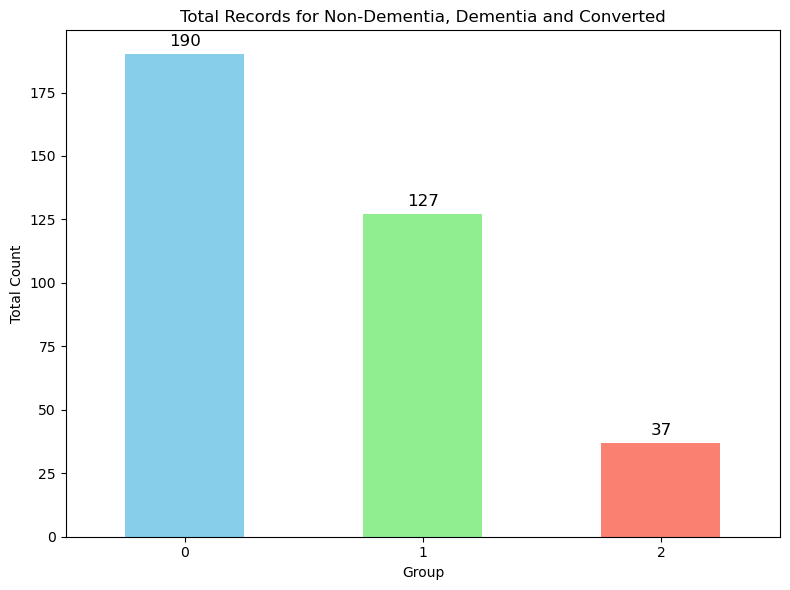

In [101]:
# Count the number of records for each group (Demented, Nondemented, Converted)
group_counts = df['Group'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
ax = group_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], rot=0)

# Annotate the bar chart with exact values
for i, count in enumerate(group_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.title('Total Records for Non-Dementia, Dementia and Converted')
plt.xlabel('Group')
plt.ylabel('Total Count')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

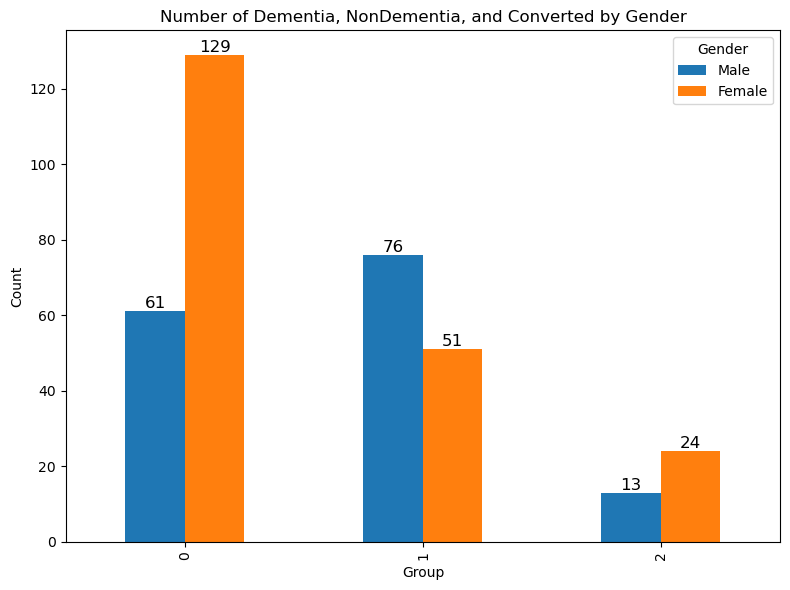

In [102]:
# Count the number of Dementia, NonDementia, and Converted for each gender
gender_group_counts = df.groupby(['Group', 'M/F']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(8, 6))
ax = gender_group_counts.plot(kind='bar', figsize=(8, 6))

# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

# Add labels and title
plt.title('Number of Dementia, NonDementia, and Converted by Gender')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(['Male', 'Female'], title='Gender')

# Display the plot
plt.tight_layout()
plt.show()


total of 204 F  
63.24% are ND  
25.00% are D  
11.76% are C  

total of 150 M  
40.67% are ND  
50.67% are D  
8.67% are C  

Does this mean men are more prone to dementia or is this just an imbalanced dataset and we need more samples?


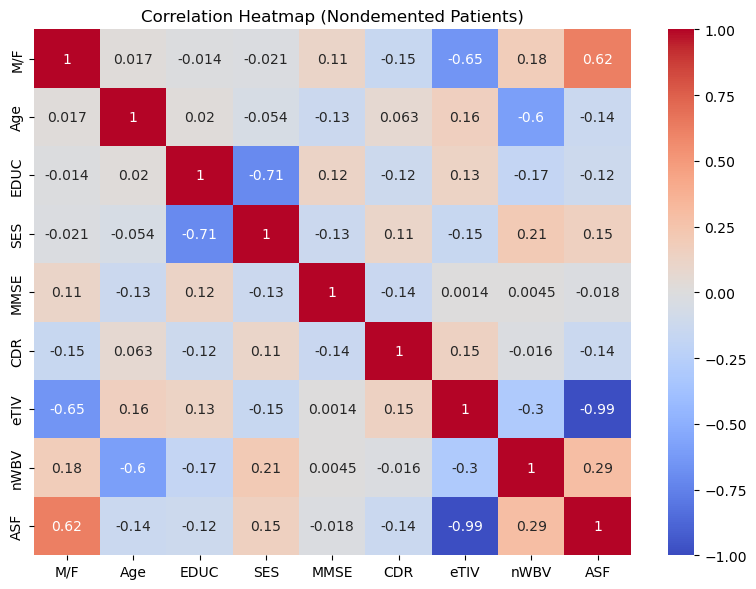

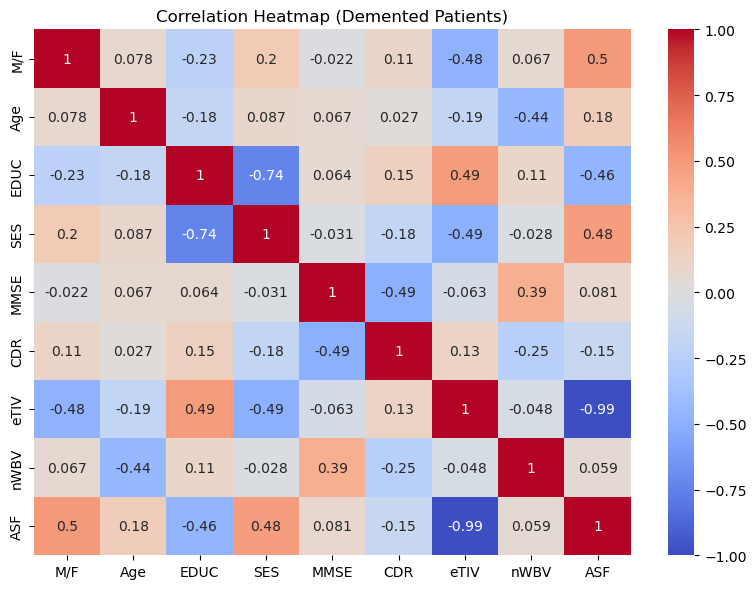

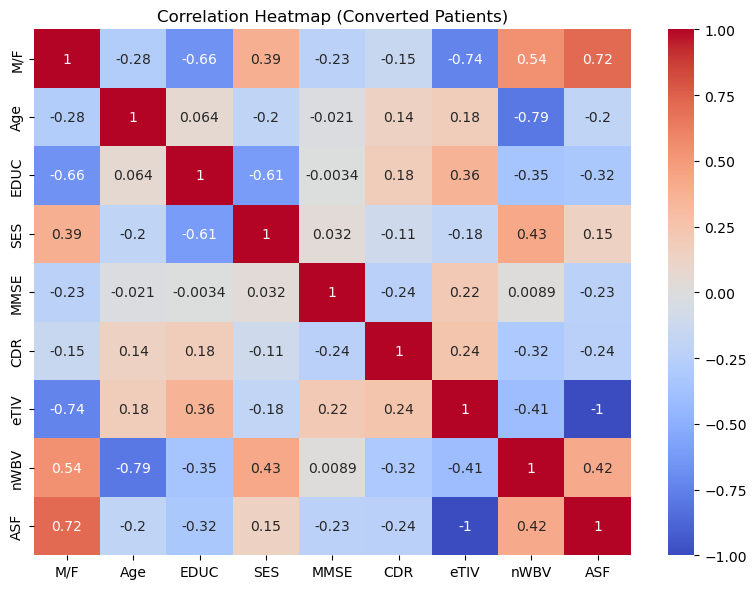

In [107]:
# Select the relevant columns including M/F, but excluding 'Group'
numeric_cols = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Function to generate heatmap for a specific group
def plot_heatmap_for_group(group_label, group_number):
    group_data = df[df['Group'] == group_number]
    group_data_numeric = group_data[numeric_cols].fillna(group_data[numeric_cols].mean())
    corr_group = group_data_numeric.corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_group, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap ({group_label} Patients)')
    plt.tight_layout()
    plt.show()

# Generate heatmap for each group
plot_heatmap_for_group('Nondemented', 0)
plot_heatmap_for_group('Demented', 1)
plot_heatmap_for_group('Converted', 2)


<Axes: xlabel='ASF', ylabel='Count'>

<Figure size 1000x600 with 0 Axes>

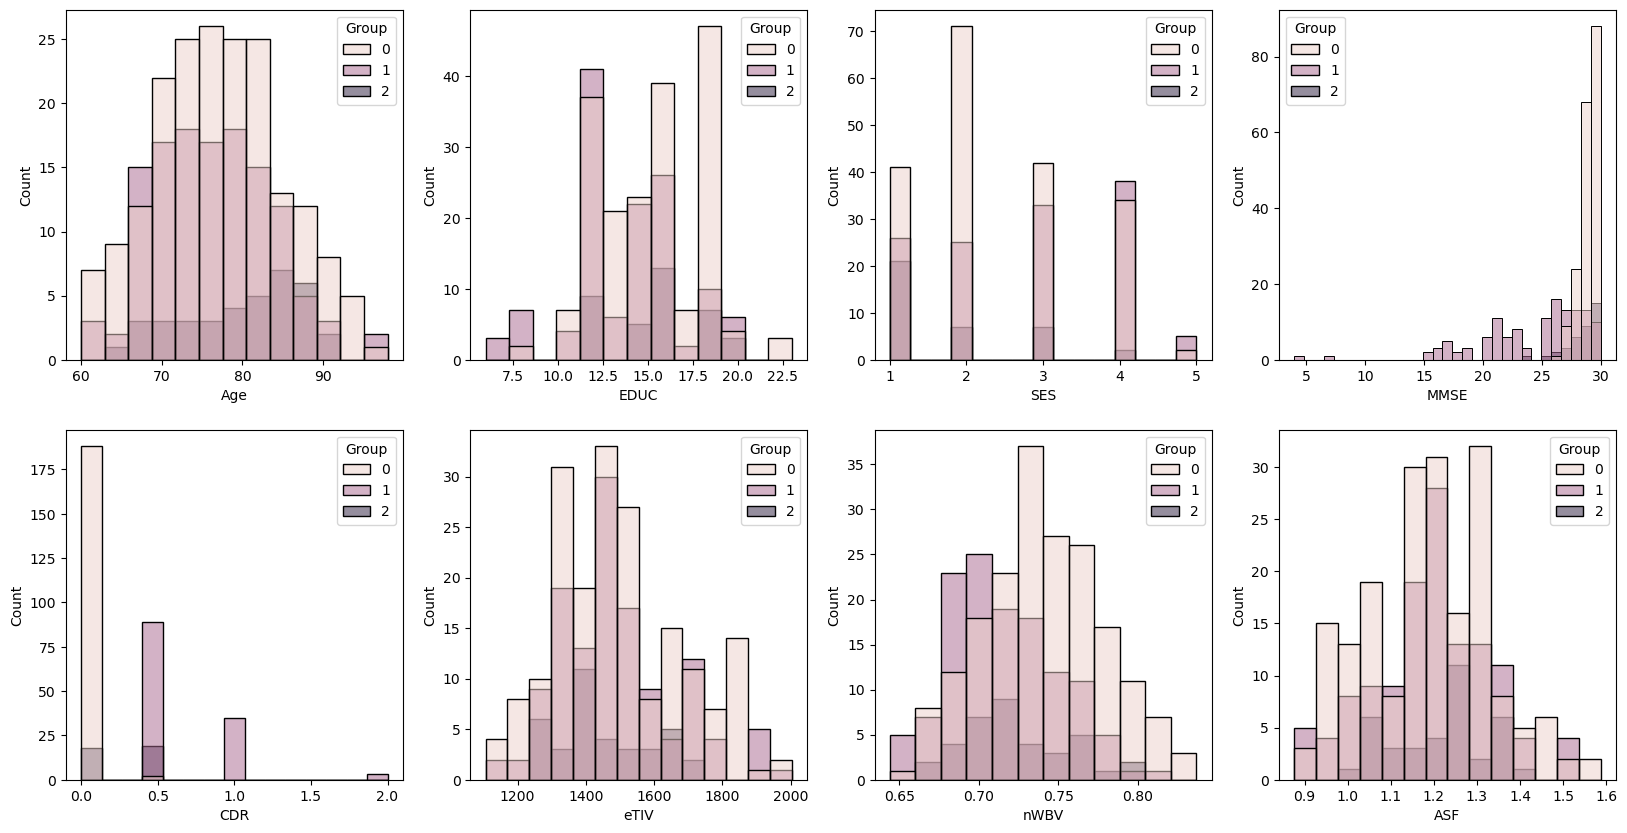

In [97]:
# Histogram distribution with groups
plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
sns.histplot(data=df, x='Age', hue='Group', ax=axs[0, 0])
sns.histplot(data=df, x='EDUC', hue='Group', ax=axs[0, 1])
sns.histplot(data=df, x='SES', hue='Group', ax=axs[0, 2])
sns.histplot(data=df, x='MMSE', hue='Group', ax=axs[0, 3])
sns.histplot(data=df, x='CDR', hue='Group', ax=axs[1, 0])
sns.histplot(data=df, x='eTIV', hue='Group', ax=axs[1, 1])
sns.histplot(data=df, x='nWBV', hue='Group', ax=axs[1, 2])
sns.histplot(data=df, x='ASF', hue='Group', ax=axs[1, 3])

c:\Users\fahee\miniconda3\envs\dmml\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\fahee\AppData\Local\Temp\ipykernel_12388\312850422.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

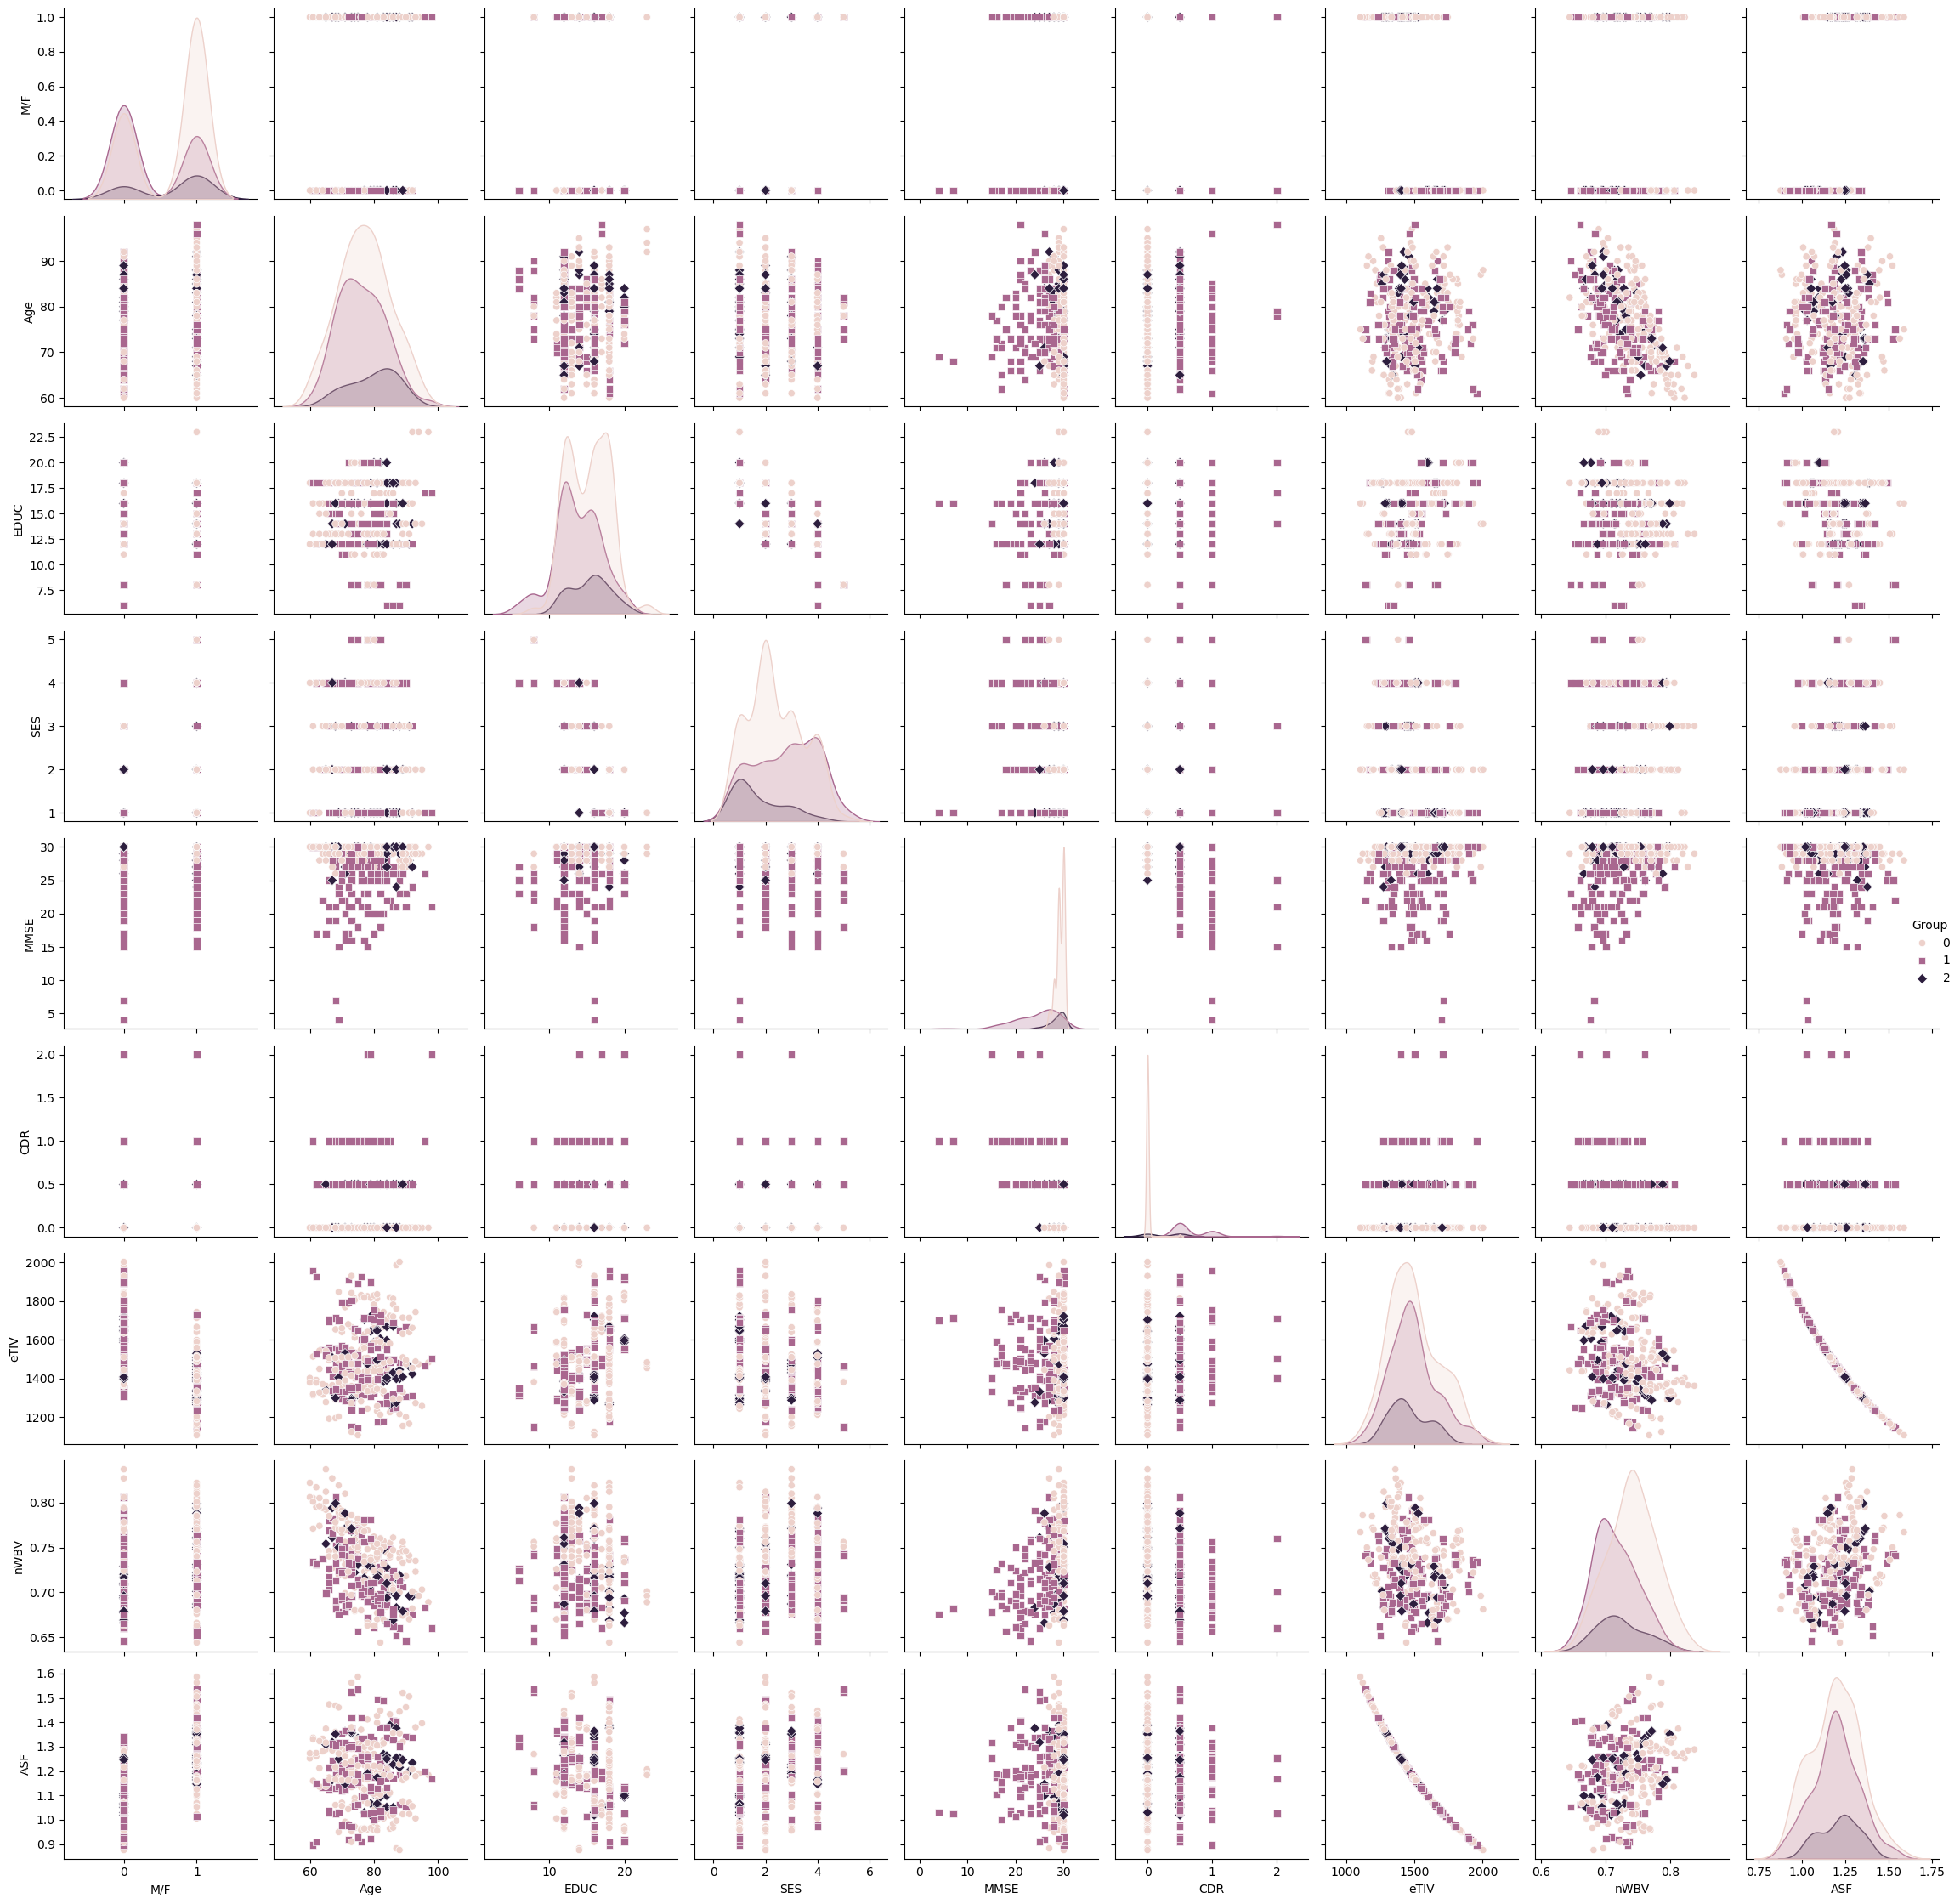

In [98]:
#pairplot
fig = plt.figure(figsize=(12, 10))  # Increase figure size
sns.pairplot(data=df, hue="Group", markers=["o", "s", "D"])

# Apply tight layout to avoid overlap
plt.tight_layout()


We can see clear seperations in CDR and MMSE

<Axes: xlabel='M/F', ylabel='ASF'>

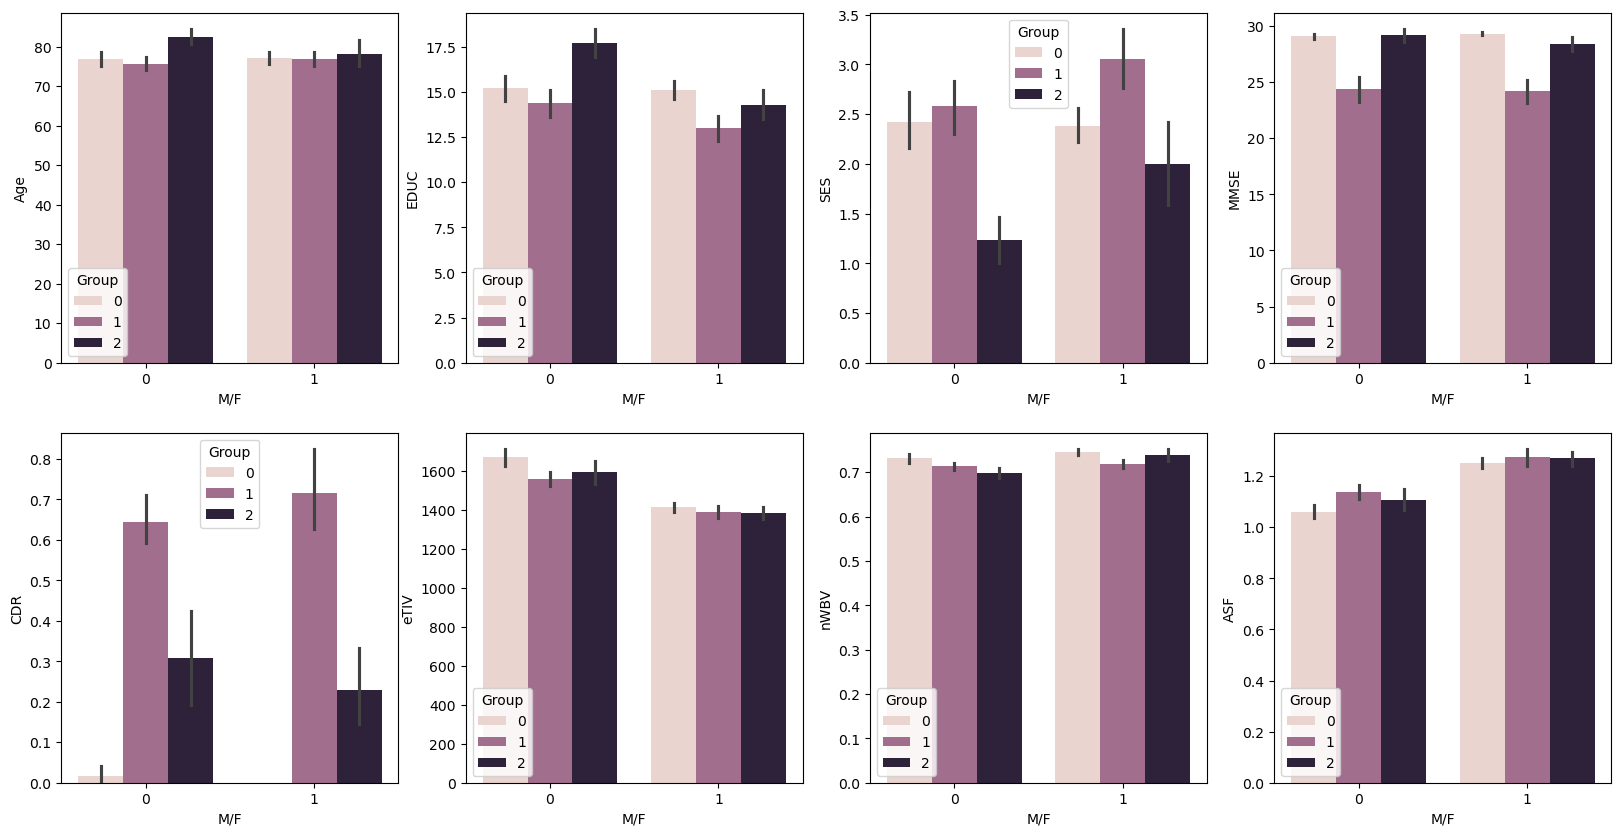

In [92]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
sns.barplot(data=df, x='M/F', y='Age', hue='Group', ax=axs[0, 0])
sns.barplot(data=df, x='M/F', y='EDUC', hue='Group', ax=axs[0, 1])
sns.barplot(data=df, x='M/F', y='SES', hue='Group', ax=axs[0, 2])
sns.barplot(data=df, x='M/F', y='MMSE', hue='Group', ax=axs[0, 3])
sns.barplot(data=df, x='M/F', y='CDR', hue='Group', ax=axs[1, 0])
sns.barplot(data=df, x='M/F', y='eTIV', hue='Group', ax=axs[1, 1])
sns.barplot(data=df, x='M/F', y='nWBV', hue='Group', ax=axs[1, 2])
sns.barplot(data=df, x='M/F', y='ASF', hue='Group', ax=axs[1, 3])